Pro. Fernando Amaral  -  [www.eia.ai](https://www.eia.ai)

In [ ]:
#GPU

In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision

In [4]:
use_gpu = True if torch.cuda.is_available() else False

total_images = 16

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [30]:
noise, _ = model.buildNoiseData(total_images)

print(noise)

tensor([[ 0.4232,  0.8761,  1.4477,  ...,  0.0000,  0.0000,  0.0000],
        [-1.3743, -0.9107, -0.2662,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.7507,  0.8352, -1.2221,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 1.2481,  0.1743,  0.3578,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6405, -0.4133,  0.8890,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.0412, -1.7068,  0.6201,  ...,  0.0000,  0.0000,  1.0000]],
       device='cuda:0')


In [31]:
with torch.no_grad():
    images = model.test(noise)

In [32]:
images = images - images.min()
images = images / images.max()

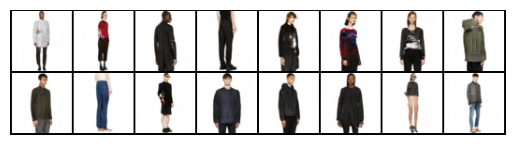

In [33]:
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()